In [5]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

In [14]:
df = pd.read_csv('iris.csv')
print(df)
print("$$$$$$$$$$$$$$$")


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
$$$$$$$$$$$$$$$
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.

In [18]:
from sklearn.preprocessing import LabelEncoder
# Encode species column (setosa=0, versicolor=1, virginica=2)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [19]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df[["species"]]
print(X)
print("*********")
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
*********
     species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the XGBClassifier
model = xgb.XGBClassifier()
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


#### Lets see which feature did xgboost found to be most important

        Feature  Importance
2  petal_length    0.752451
3   petal_width    0.207423
1   sepal_width    0.029049
0  sepal_length    0.011077


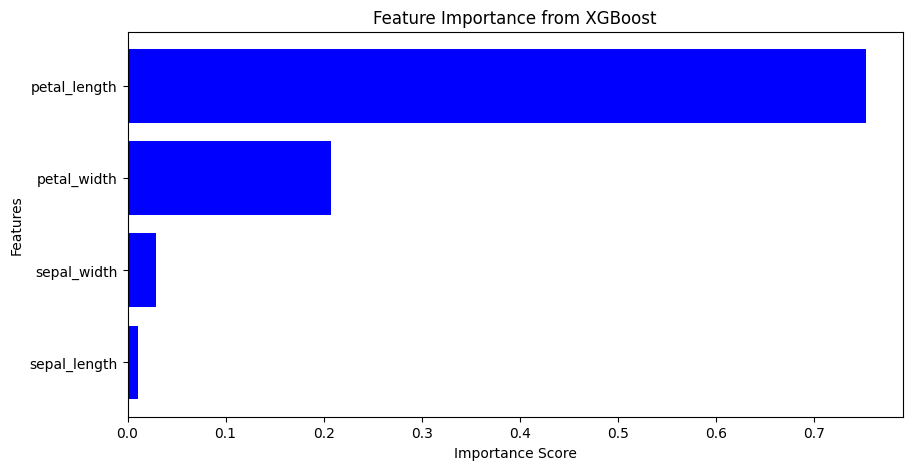

In [24]:
# Extract feature importance
importance = model.feature_importances_

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

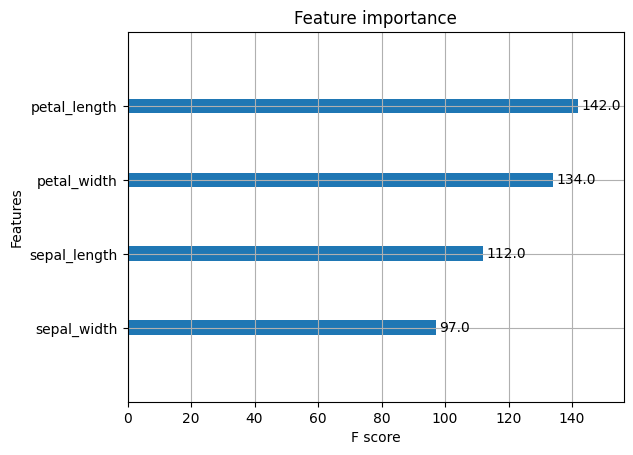

In [25]:
xgb.plot_importance(model)
plt.show()


                  gain      cover  weight
petal_length  2.635139  11.937937   142.0
petal_width   0.726412   6.477408   134.0
sepal_width   0.101731   3.614954    97.0
sepal_length  0.038793   3.547123   112.0


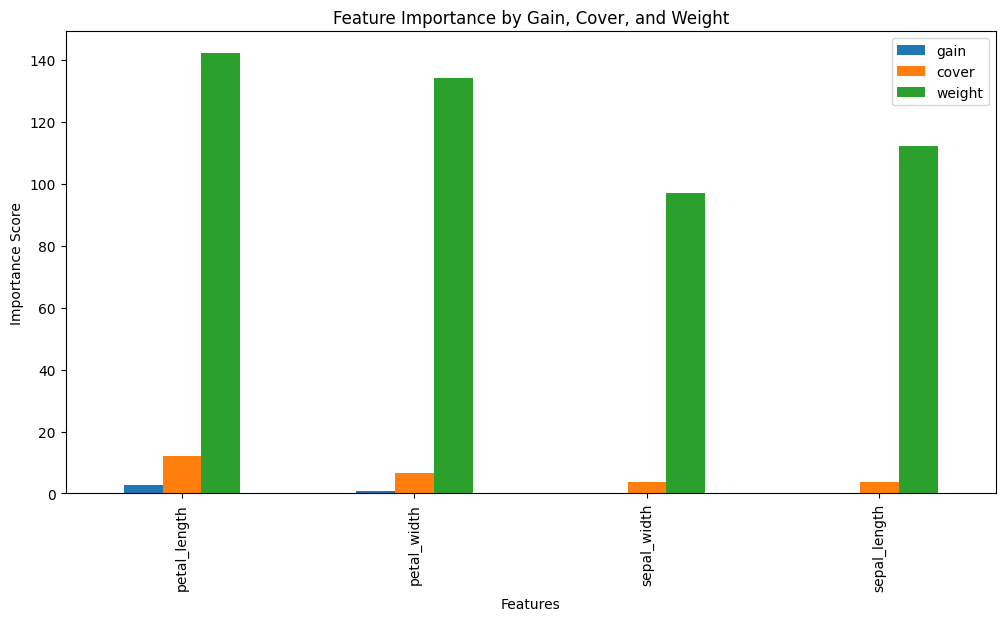

In [27]:
booster = model.get_booster()
importance_types = ["gain", "cover", "weight"]

feature_importance = {}
for imp_type in importance_types:
    feature_importance[imp_type] = booster.get_score(importance_type=imp_type)

# Convert to DataFrame for better readability
df_importance = pd.DataFrame(feature_importance).fillna(0)
df_importance.index = X.columns
df_importance = df_importance.sort_values(by="gain", ascending=False)  # Sort by Gain

print(df_importance)

# Plot feature importance for different types
df_importance.plot(kind='bar', figsize=(12, 6), title="Feature Importance by Gain, Cover, and Weight")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

- Gain (default) → How much a feature contributes to reducing the loss function.
- Cover → The average number of samples a feature contributes to in decision trees.
- Weight (Frequency) → How often a feature is used to split the data in tree. Good for feature selection. Tells which feature was given more weight.
